Copy this collab file and start attempting the questions yourself(very good if you try atleast once on your own)

## Aim
The goal of this assignment is to make predictions using linear regression. We will be implementing the linear regression model from scratch. We have been provided with a hypothetical dataset of a company that wants to predict the price of a car. Our task is to build a linear regression model that can accurately predict the price of a car based on the given features in dataset.
NOTE: Data is hypothetical price of the car may be negative.

### #Import necessary libraries(Numpy,Pandas,Matplotlib)

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating the dataset
Run the cell below to load the dataset.

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 1kjUHAjfl2FGx5tZ219EzyOJiAwTsqjbO

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kjUHAjfl2FGx5tZ219EzyOJiAwTsqjbO
To: /content/car_dataa.csv
100% 34.2k/34.2k [00:00<00:00, 50.4MB/s]


In [ ]:
#read the dataset(use read_csv and head)
data = pd.read_csv('car_dataa.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,-0.860155,-94.188683,-0.410123,0.612850,Petrol,Dealer,Manual,0
1,sx4,-0.097043,15.276170,0.647960,-1.874549,Diesel,Dealer,Manual,0
2,ciaz,-0.402870,69.755387,0.457906,2.125322,Petrol,Dealer,Manual,0
3,wagon r,-0.480849,-61.144535,-0.079979,0.038635,Petrol,Dealer,Manual,0
4,swift,-2.223520,-40.620491,1.898574,-0.468699,Diesel,Dealer,Manual,0


# Cleaning the data

In [ ]:
#first get the idea of dataset(use info and describe)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    float64
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    float64
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.100527,10.052129,0.010534,0.088063,0.043189
std,0.982259,114.584206,0.866835,1.026881,0.247915
min,-2.379775,-253.872034,-2.071417,-2.883218,0.000000
25%,-0.599478,-74.702199,-0.607684,-0.528196,0.000000
50%,0.118979,6.175703,-0.043945,0.081264,0.000000
75%,0.783892,83.750574,0.602204,0.718059,0.000000
max,2.786804,365.959535,2.360360,2.704963,3.000000


Removing unwanted columns

Delete Unwanted Columns like Car_Name, Fuel_Type, Seller_Type, Owner, Transmission

In [ ]:
#deleting unwanted columns(can use df.drop)
data.drop(['Car_Name','Fuel_Type','Seller_Type','Owner','Transmission'],axis=1,inplace=True)

Take out Selling price as y and other columns(features) as X

In [ ]:
#check the Shape of X
y = data['Selling_Price']
X = data.drop('Selling_Price',axis=1)
X.shape

(301, 3)

In [ ]:
#check the Shape of y
y.shape

(301,)

In [ ]:
#print X and check
X

,Year,Present_Price,Kms_Driven
0,-0.860155,-0.410123,0.612850
1,-0.097043,0.647960,-1.874549
2,-0.402870,0.457906,2.125322
3,-0.480849,-0.079979,0.038635
4,-2.223520,1.898574,-0.468699
...,...,...,...
296,1.007247,-1.083003,-0.229690
297,1.721243,-0.859128,0.378223
298,-0.171465,-0.944369,-0.495819
299,-0.605274,2.360360,-0.057051


In [ ]:
#print y and check
y

0      -94.188683
1       15.276170
2       69.755387
3      -61.144535
4      -40.620491
          ...    
296     20.693798
297     87.938514
298   -154.588890
299    171.969714
300     35.857232
Name: Selling_Price, Length: 301, dtype: float64

### Dividing Data into Test and Train data

In [ ]:
#Divide data into train and test using train_test_split
from sklearn import datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#read what random_state=1234 signifies here :)

In [ ]:
#find Shape of X
X_train.shape
X_test.shape

(61, 3)

In [ ]:
#find Shape of y
y_train.shape
y_test.shape

(61,)

# Visualize the Data

Plot y vs x graphs for y and every feature of X

you should be able to see 3 graphs.Notice the linear relations between y and the features in vector X.



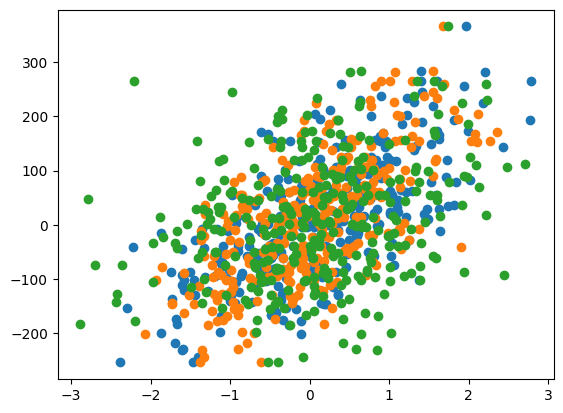

In [ ]:
#plot graph using matplotlib
plt.scatter(X['Year'],y)
plt.scatter(X['Present_Price'],y)
plt.scatter(X['Kms_Driven'],y)
plt.show()

# Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$
4. <h4>Repeat until it fits good enough</h4>

In [ ]:
import numpy as np

class LinearRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated


## Initializing, Training & Predictions

In [ ]:
# Now, we make an object of our custom class.
regressor = LinearRegression(learning_rate=0.01, n_iters=1000) # You may pass the custom parameters or let the default values take it ahead

# Call the fit method on the object to train (pass appropriate part of dataset)
regressor.fit(X_train,y_train)


# Now, let's see our what our model predicts # pass appropriate part of dataset
predictions = regressor.predict(X_test)

# Printing the first 5 predictions to check
print(predictions[:5])

[120.5965916   22.72409917 -13.91804373 -66.22373142 156.6235187 ]


# Evaluate the Model

Return Mean Squared Error & R2 Score from the functions below.(study about these methods if you dont have an idea)

In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test, predictions)

print("R2 Score:", r2)
print("MSE:", mse)


R2 Score: 0.9780975533580869
MSE: 318.61010553956254


In [ ]:
#Print first 10 values of prediction and y_test
predictions[:10]

array([ 120.5965916 ,   22.72409917,  -13.91804373,  -66.22373142,
        156.6235187 ,   25.25134139,  206.28113952, -152.40206492,
        153.09752751,  -23.10137172])

In [ ]:
y_test[:10]

92     125.948842
162     21.541047
225      1.227178
155    -86.154698
108    154.153259
134      6.359070
40     219.995546
208   -139.070368
270    167.017709
106    -60.251874
Name: Selling_Price, dtype: float64